# TP4 MACHINE LEARNING

## Arbres de Classification 

In [1]:
from tptreesource import *
from sklearn import tree
import graphviz
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Question 1

## Question 2

### Visualisation des données

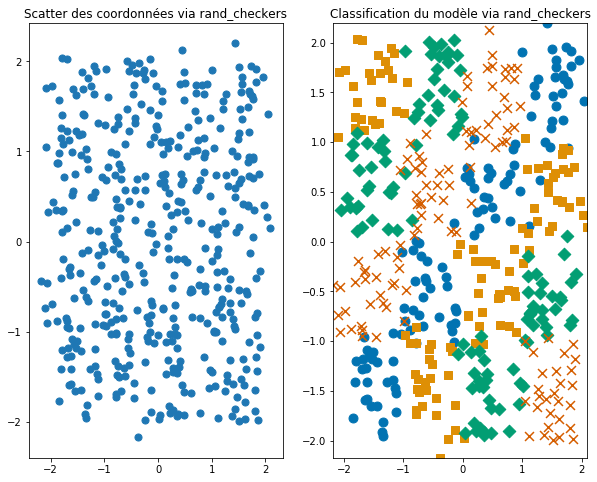

In [2]:
n_Q2 = 114
Values_check = rand_checkers(n1=n_Q2, n2=n_Q2, n3=n_Q2, n4=n_Q2, sigma=0.1)
X_check = Values_check[:,[0,1]]
y_check = Values_check[:,[-1]]

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plot_2d_simple(X_check)
plt.title('Scatter des coordonnées via rand_checkers')

plt.subplot(1,2,2)
plot_2d(X_check, y_check)
plt.title('Classification du modèle via rand_checkers')
plt.show()

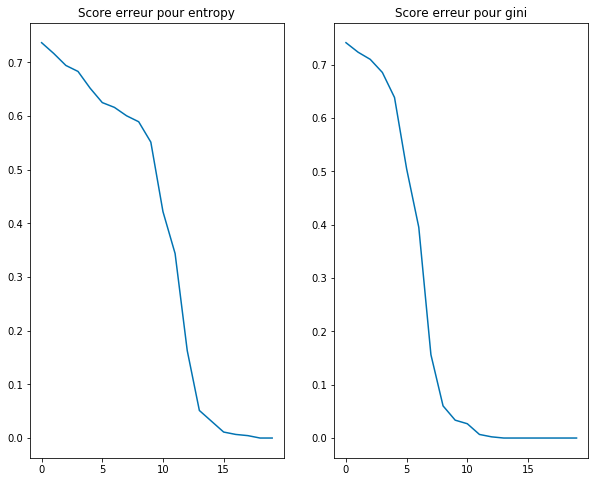

In [3]:
score_entr = []
score_gini = []

for md in range(1, 21):
    DT_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=2)
    DT_entropy.fit(X_check, y_check)
    score_entr.append(DT_entropy.score(X_check, y_check))


    DT_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=2)
    DT_gini.fit(X_check, y_check)
    score_gini.append(DT_gini.score(X_check, y_check))

entr_err = np.ndarray.tolist(1 - np.array(score_entr))
gini_err = np.ndarray.tolist(1 - np.array(score_gini))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(entr_err)
plt.title('Score erreur pour entropy')
plt.subplot(1,2,2)
plt.plot(gini_err)
plt.title('Score erreur pour gini')
plt.show()

## Question 3

In [4]:
# trouve les optimum
depth_entr = entr_err.index(min(entr_err))+1
depth_gini = gini_err.index(min(gini_err))+1

DT_entropy_opti_depth = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth_entr, random_state=2)
DT_entropy_opti_depth.fit(X_check, y_check)

DT_gini_opti_depth = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth_gini, random_state=2)
DT_gini_opti_depth.fit(X_check, y_check)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

### plot 2d

### plot frontiere

In [5]:
def frontiere_new(f, X, y, w=None, step=50, alpha_choice=1, colorbar=True,
                  samples=True):
    """ trace la frontiere pour la fonction de decision f"""
    # construct cmap

    min_tot0 = np.min(X[:, 0])
    min_tot1 = np.min(X[:, 1])
    max_tot0 = np.max(X[:, 0])
    max_tot1 = np.max(X[:, 1])
    delta0 = (max_tot0 - min_tot0)
    delta1 = (max_tot1 - min_tot1)
    xx, yy = np.meshgrid(np.arange(min_tot0, max_tot0, delta0 / step),
                         np.arange(min_tot1, max_tot1, delta1 / step))
    #z = np.array([f([vec]) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = np.array([f.predict([vec]).astype(int) for vec in np.c_[xx.ravel(), yy.ravel()]])
    z = z.reshape(xx.shape)
    labels = np.unique(z)
    color_blind_list = sns.color_palette("colorblind", labels.shape[0])
    sns.set_palette(color_blind_list)
    my_cmap = ListedColormap(color_blind_list)
    plt.imshow(z, origin='lower', interpolation="mitchell", alpha=0.80,
               cmap=my_cmap, extent=[min_tot0, max_tot0, min_tot1, max_tot1])
    if colorbar is True:
        ax = plt.gca()
        cbar = plt.colorbar(ticks=labels)
        cbar.ax.set_yticklabels(labels)
    labels = np.unique(y)
    k = np.unique(y).shape[0]
    color_blind_list = sns.color_palette("colorblind", k)
    sns.set_palette(color_blind_list)
    ax = plt.gca()
    if samples is True:
        for i, label in enumerate(y):
            label_num = np.where(labels == label)[0][0]
            plt.scatter(X[i, 0], X[i, 1], c=color_blind_list[label_num],
                        s=80, marker=symlist[label_num])
    plt.xlim([min_tot0, max_tot0])
    plt.ylim([min_tot1, max_tot1])
    ax.get_yaxis().set_ticks([])
    ax.get_xaxis().set_ticks([])
    if w is not None:
        plt.plot([min_tot0, max_tot0],
                 [min_tot0 * -w[1] / w[2] - w[0] / w[2],
                  max_tot0 * -w[1] / w[2] - w[0] / w[2]],
                 "k", alpha=alpha_choice)

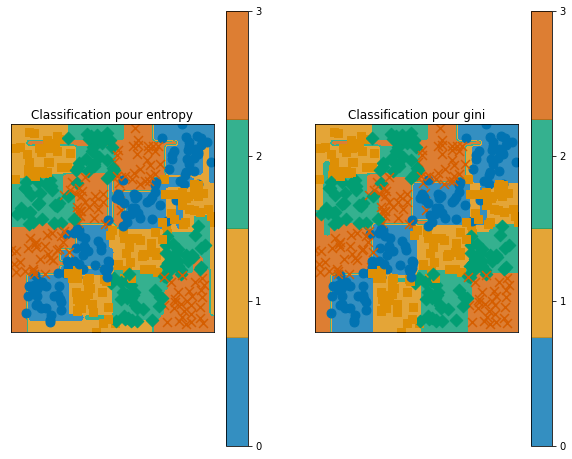

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
frontiere_new(DT_entropy_opti_depth, X_check, y_check)
plt.title('Classification pour entropy')
plt.subplot(1,2,2)
frontiere_new(DT_gini_opti_depth, X_check, y_check)
plt.title('Classification pour gini')
plt.show()

## Question 4

### pour l'entropy

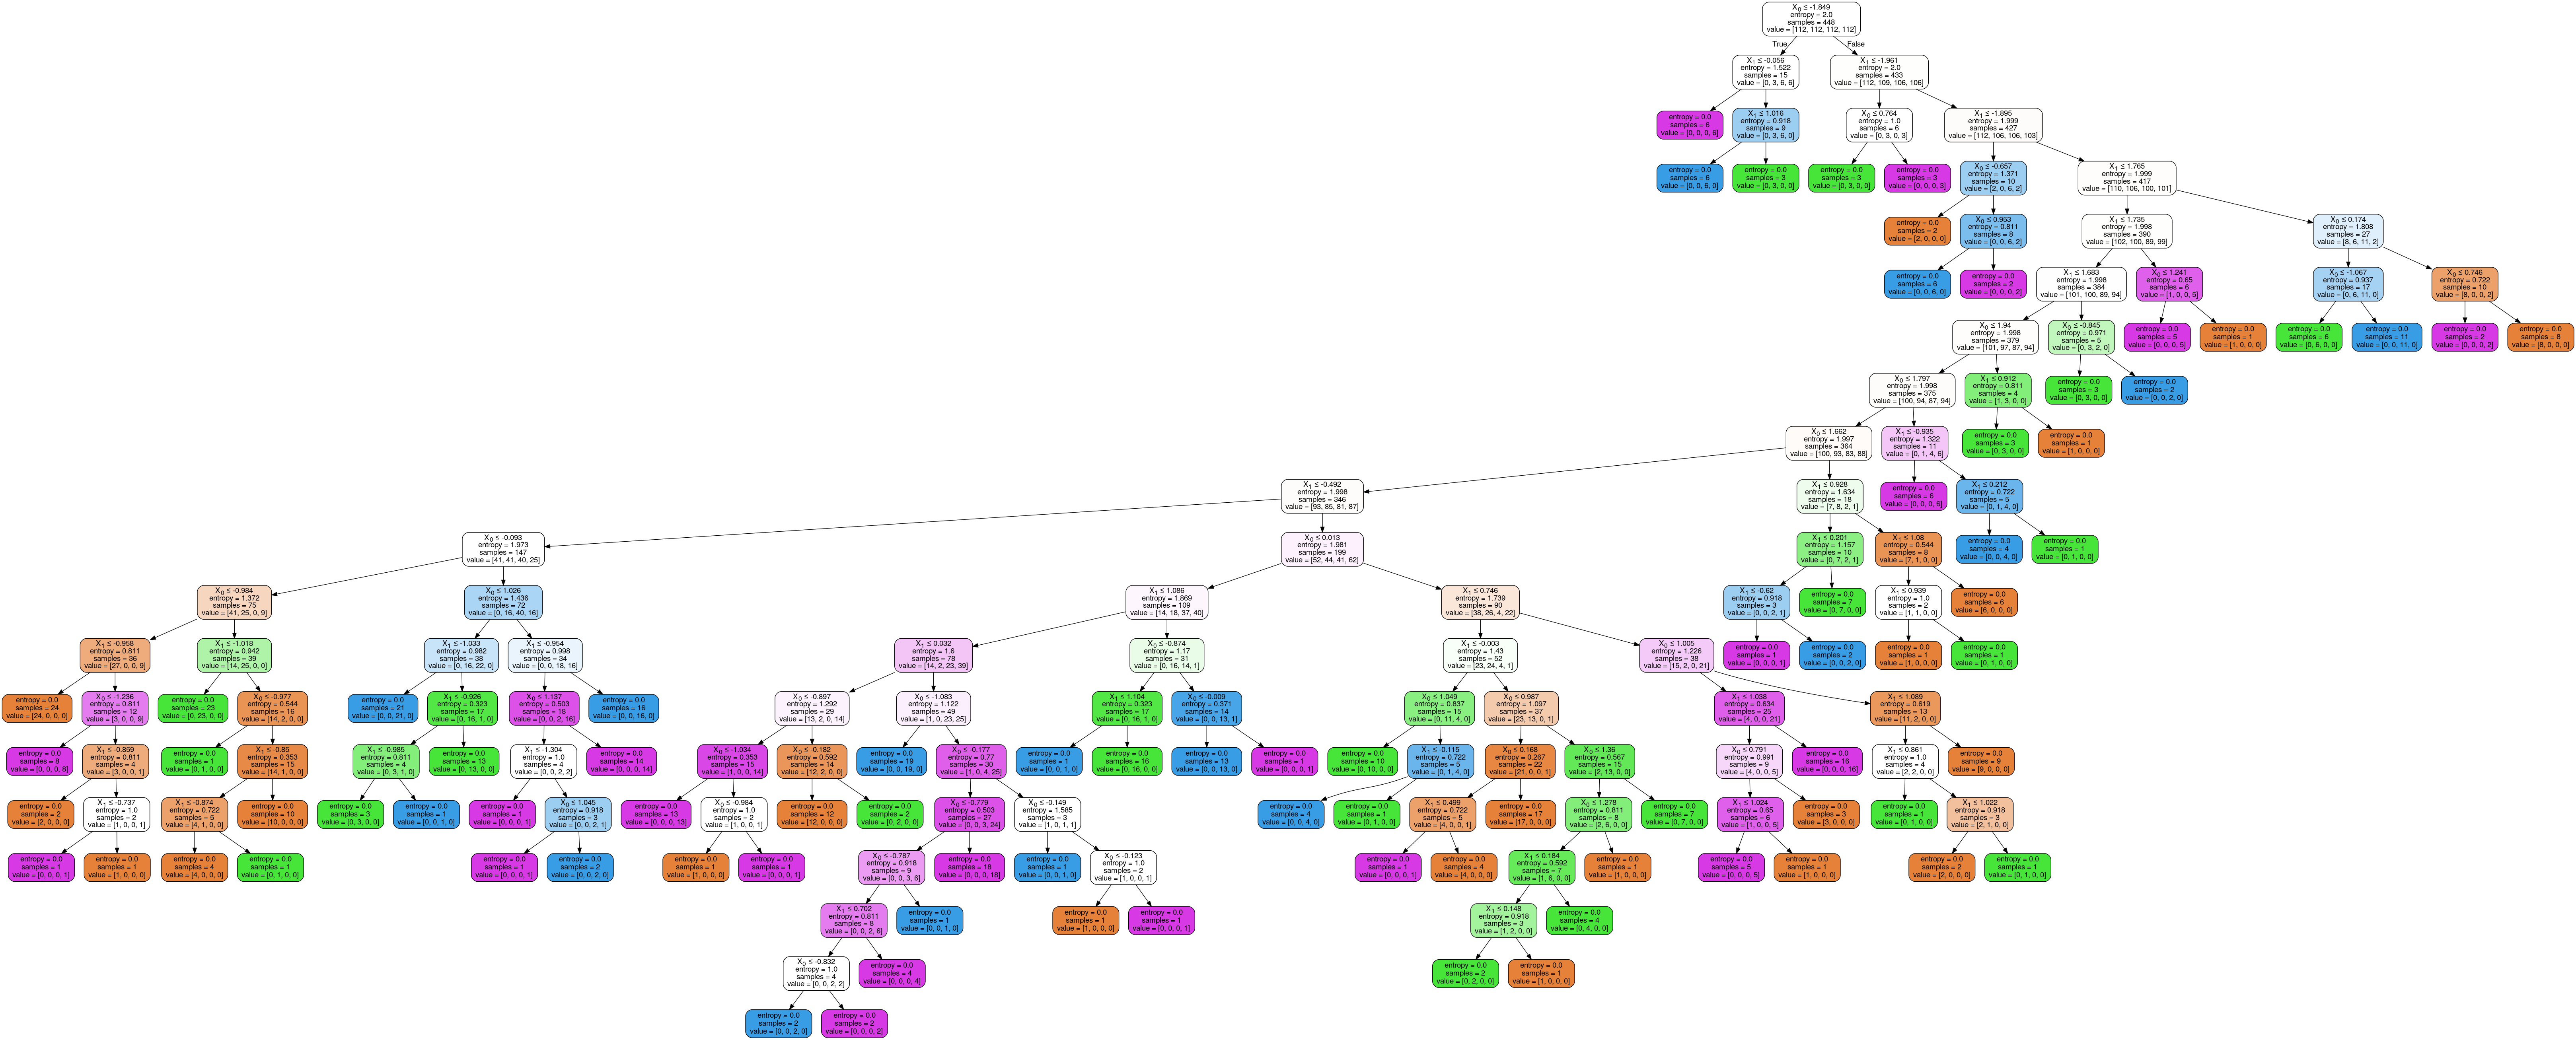

In [13]:
dot_data = StringIO()
export_graphviz(DT_entropy_opti_depth, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### pour gini

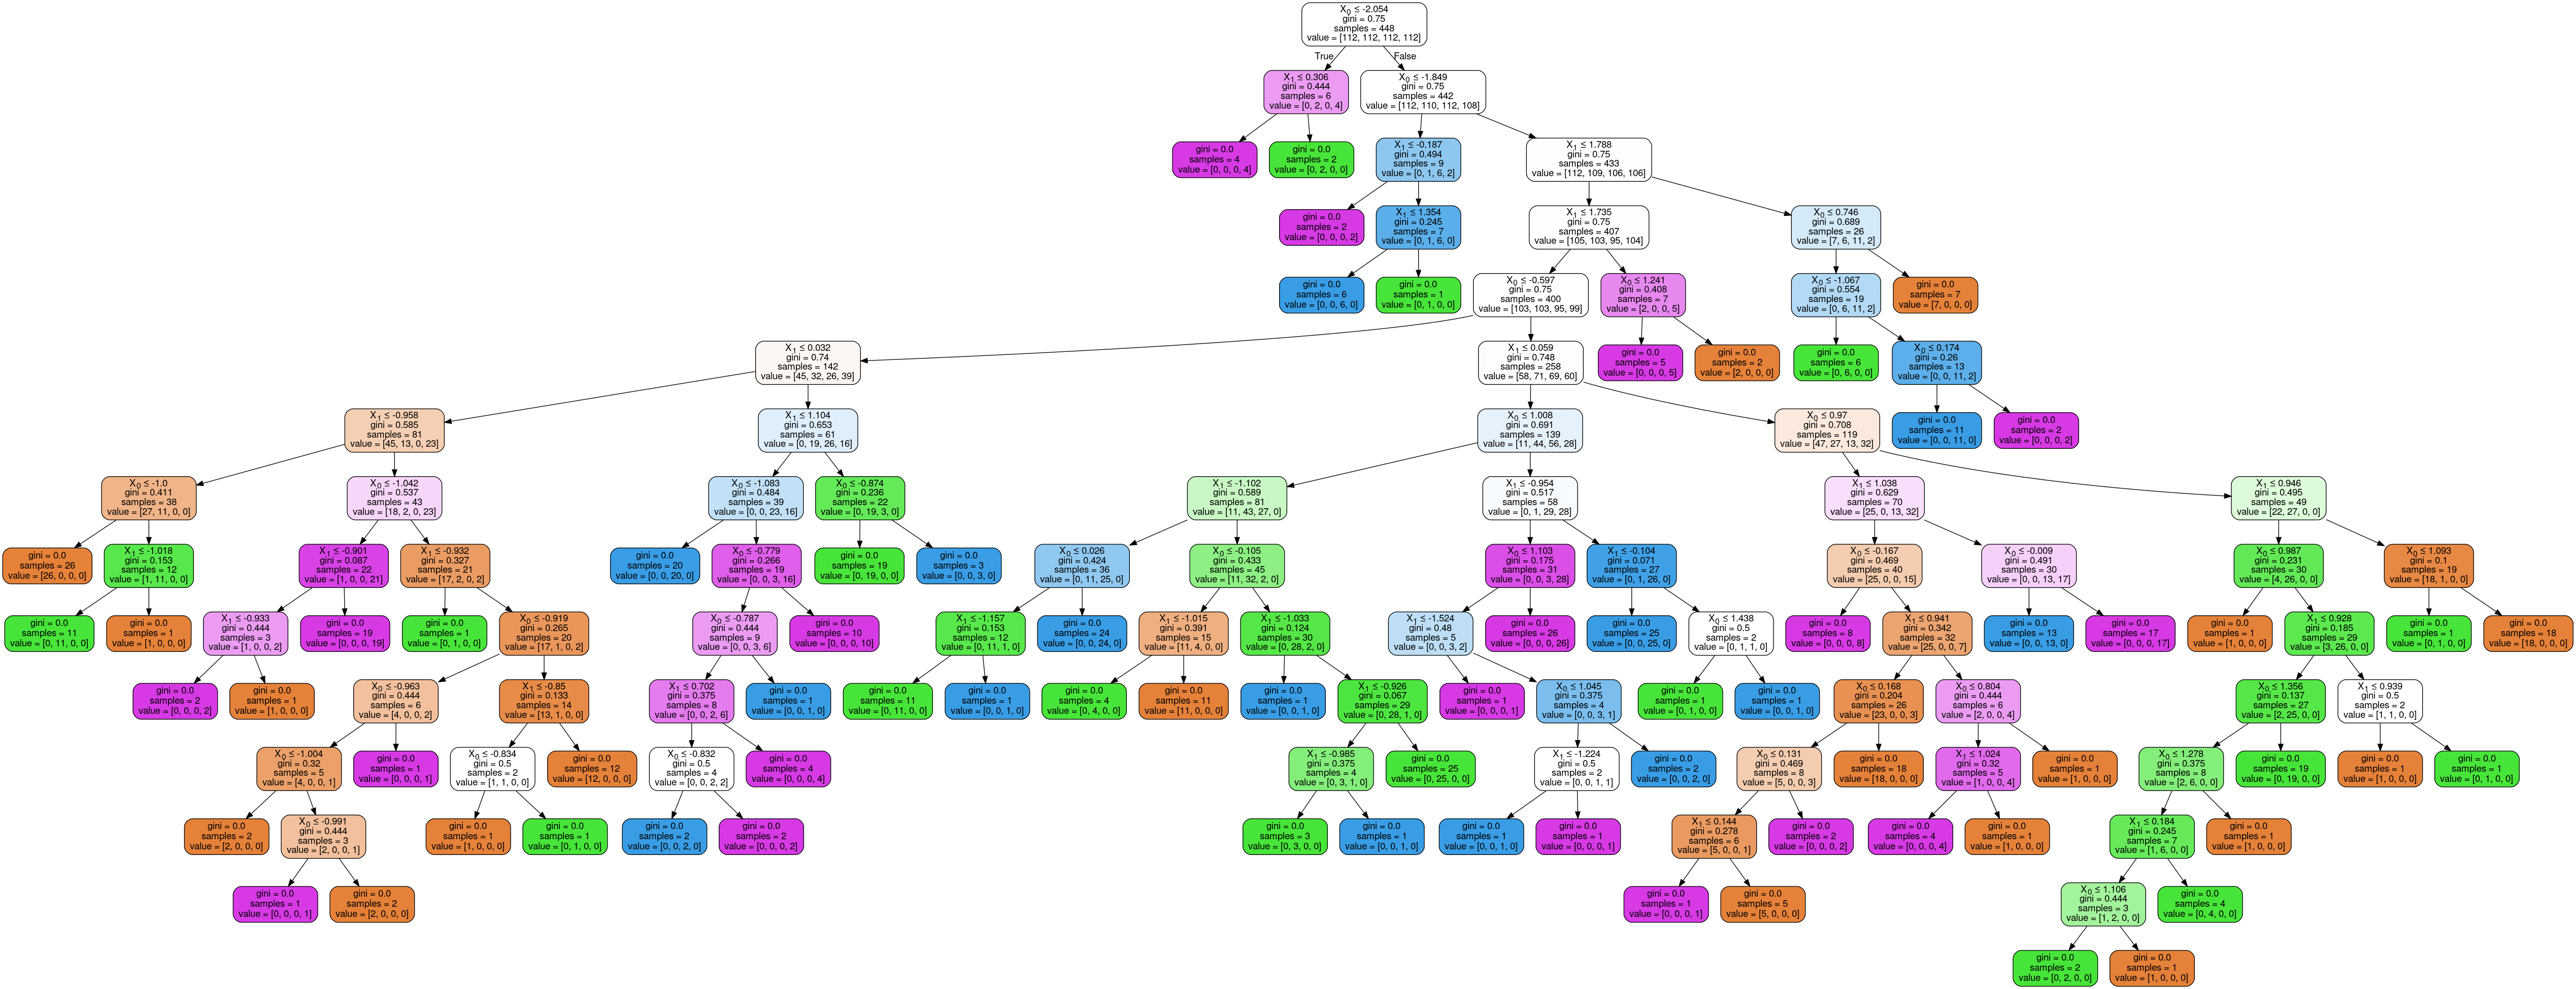

In [14]:
dot_data = StringIO()
export_graphviz(DT_gini_opti_depth, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Question 5

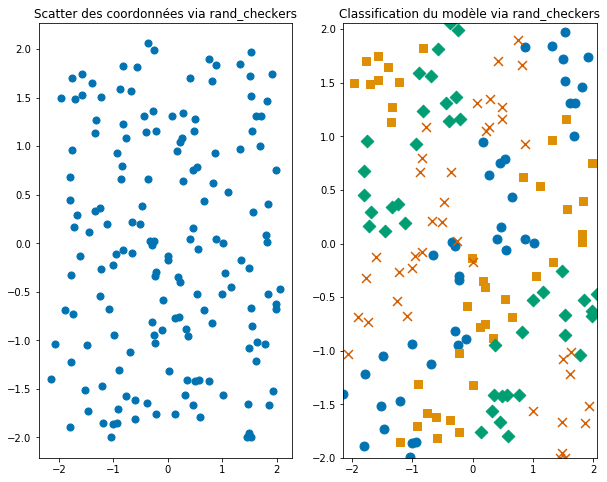

In [7]:
n_Q5 = 40
Values_check2 = rand_checkers(n1=n_Q5, n2=n_Q5, n3=n_Q5, n4=n_Q5, sigma=0.1)
X_check2 = Values_check2[:,[0,1]]
y_check2 = Values_check2[:,[-1]]

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plot_2d_simple(X_check2)
plt.title('Scatter des coordonnées via rand_checkers')

plt.subplot(1,2,2)
plot_2d(X_check2, y_check2)
plt.title('Classification du modèle via rand_checkers')
plt.show()

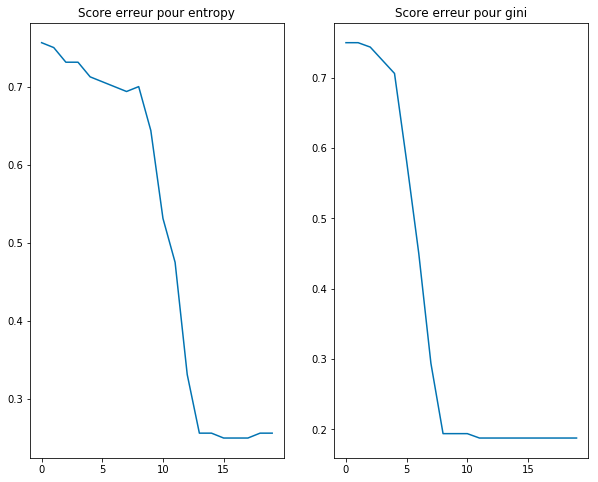

In [8]:
score_entr2 = []
score_gini2 = []

for md in range(1, 21):
    DT_entropy2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=2)
    DT_entropy2.fit(X_check, y_check)
    score_entr2.append(DT_entropy2.score(X_check2, y_check2))


    DT_gini2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=2)
    DT_gini2.fit(X_check, y_check)
    score_gini2.append(DT_gini2.score(X_check2, y_check2))

entr_err2 = np.ndarray.tolist(1 - np.array(score_entr2))
gini_err2 = np.ndarray.tolist(1 - np.array(score_gini2))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(entr_err2)
plt.title('Score erreur pour entropy')
plt.subplot(1,2,2)
plt.plot(gini_err2)
plt.title('Score erreur pour gini')
plt.show()

## Question 6

### récupération des données

In [9]:
digits = datasets.load_digits()

digit_data_train, digit_data_test, digit_target_train, digit_target_test = \
train_test_split(digits.data, digits.target, test_size=0.2, random_state=2)

### comparaison des modèles

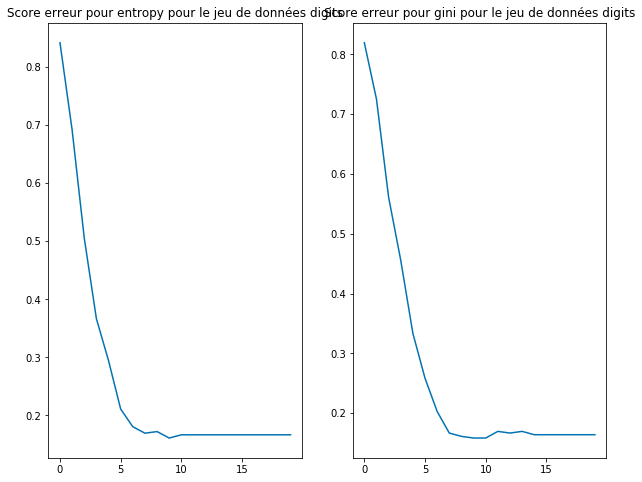

In [10]:
score_entr_digit = []
score_gini_digit = []

for md in range(1, 21):
    DT_entropy_digit = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=2)
    DT_entropy_digit.fit(digit_data_train, digit_target_train)
    score_entr_digit.append(DT_entropy_digit.score(digit_data_test, digit_target_test))

    DT_gini_digit = tree.DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=2)
    DT_gini_digit.fit(digit_data_train, digit_target_train)
    score_gini_digit.append(DT_gini_digit.score(digit_data_test, digit_target_test))

entr_err_digit = np.ndarray.tolist(1 - np.array(score_entr_digit))
gini_err_digit = np.ndarray.tolist(1 - np.array(score_gini_digit))

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.plot(entr_err_digit)
plt.title('Score erreur pour entropy pour le jeu de données digits')
plt.subplot(1,2,2)
plt.plot(gini_err_digit)
plt.title('Score erreur pour gini pour le jeu de données digits')
plt.show()

## Question 7

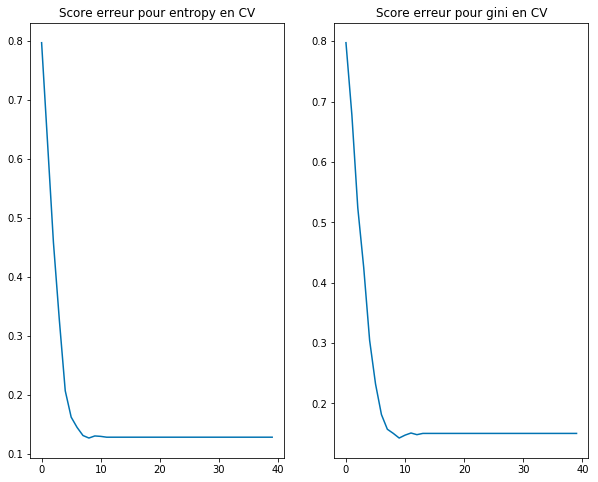

In [11]:
err_entrop_cv = []
err_gini_cv = []

for md in range(1, 41):
    ENTROPY = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=2)
    entrop_cv = cross_val_score(ENTROPY, digit_data_train, digit_target_train, cv=5)
    err_entrop_cv.append(np.mean(entrop_cv))

    GINI = tree.DecisionTreeClassifier(criterion='gini', max_depth=md, random_state=2)
    gini_cv = cross_val_score(GINI, digit_data_train, digit_target_train, cv=5)
    err_gini_cv.append(np.mean(gini_cv))
    
entr_err_cv = np.ndarray.tolist(1 - np.array(err_entrop_cv))
gini_err_cv = np.ndarray.tolist(1 - np.array(err_gini_cv))

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(entr_err_cv)
plt.title('Score erreur pour entropy en CV')
plt.subplot(1,2,2)
plt.plot(gini_err_cv)
plt.title('Score erreur pour gini en CV')
plt.show()

## Question 8

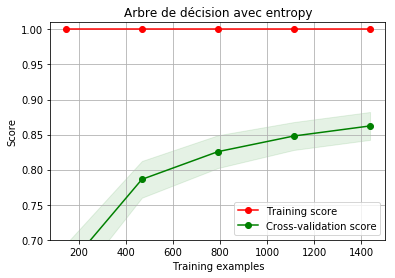

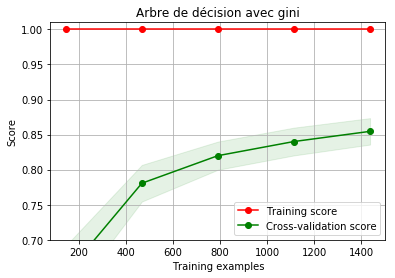

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=2)

title = "Arbre de décision avec entropy"
estimator = tree.DecisionTreeClassifier(criterion='entropy', random_state=2)
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Arbre de décision avec gini"
estimator = tree.DecisionTreeClassifier(criterion='gini', random_state=2)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()